In [1]:
import pandas as pd
from IPython.display import display
import ipywidgets as widgets

In [3]:
# Load the dataset
data = pd.read_csv("zhvi.csv")

# Extract unique states and map counties
state_county_mapping = data.groupby('StateName')['RegionName'].apply(list).to_dict()

In [5]:
# Manually select the state and county
selected_state = "CA"  # Example: California
selected_county = "Los Angeles County"  # Example: Los Angeles County

# Filter the data
filtered_data = data[(data["StateName"] == selected_state) & (data["RegionName"] == selected_county)]

# Check the filtered data
filtered_data

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,2000-01-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,3101,0,Los Angeles County,county,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",6,37,206679.102841,...,855978.867131,851218.324044,847438.710237,848072.053695,851221.654671,853300.031599,856929.899269,862101.367502,868683.388483,873790.400103


In [7]:
# Extract date columns (those that look like 'MM/DD/YYYY')
date_columns = [col for col in data.columns if '-' in col and col[:4].isdigit()]


# Reshape the data for plotting
time_series_data = filtered_data[date_columns].T
time_series_data.columns = ["Value"]  # Assign a meaningful column name
time_series_data.index = pd.to_datetime(date_columns)  # Convert index to datetime
time_series_data.index.name = "Date"  # Name the index for clarity

# Preview the reshaped data
time_series_data.head()

,Value
Date,
2000-01-31,206679.102841
2000-02-29,206912.808502
2000-03-31,207775.596500
2000-04-30,209483.884499
2000-05-31,211656.411689


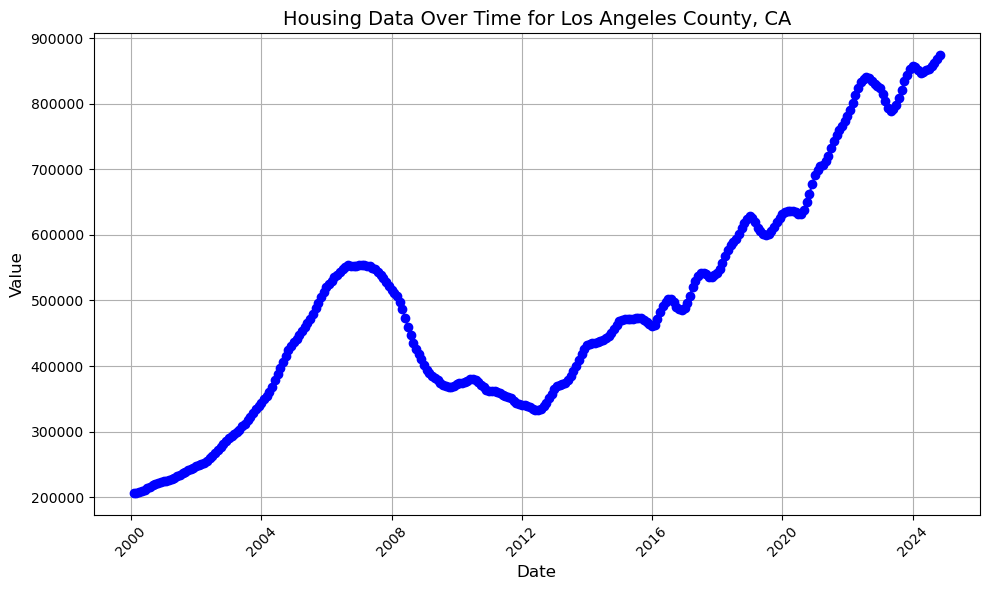

In [8]:

# Plot the data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(time_series_data.index, time_series_data["Value"], marker='o', linestyle='-', color='b')
plt.title(f"Housing Data Over Time for {selected_county}, {selected_state}", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
# Load the national dataset
zhvi_us = pd.read_csv("zhvi_us.csv")

# Check the structure
print(zhvi_us.head(2))

   RegionID  SizeRank     RegionName RegionType StateName     2000-01-31  \
0    102001         0  United States    country       NaN  121618.117906   
1    394913         1   New York, NY        msa        NY  216209.133034   

      2000-02-29     2000-03-31     2000-04-30     2000-05-31  ...  \
0  121832.083163  122097.431586  122666.551870  123321.541083  ...   
1  217127.899860  218055.176122  219934.196642  221879.987460  ...   

      2024-01-31     2024-02-29     2024-03-31     2024-04-30     2024-05-31  \
0  351518.721971  352307.611057  353841.834013  355689.143658  357116.078246   
1  636222.199812  640261.759998  645659.925232  651762.255593  656416.260742   

      2024-06-30     2024-07-31     2024-08-31     2024-09-30     2024-10-31  
0  357675.012344  357822.347127  358064.560426  358513.017685  359098.757006  
1  659493.785408  662237.503625  665976.304121  669998.634470  673519.052950  

[2 rows x 303 columns]


In [16]:
# Add missing columns to zhvi_us
for col in missing_columns:
    zhvi_us[col] = pd.NA  # Use pd.NA (or a default value, like '') for missing data

# Reorder columns to match data
zhvi_us = zhvi_us[data.columns]

In [17]:
# Extract the national data row
national_data = zhvi_us[zhvi_us["RegionName"] == "United States"]

# Append to data
data_with_national = pd.concat([data, national_data], ignore_index=True)

# Verify the combined dataframe
print(data_with_national.tail())

      RegionID  SizeRank        RegionName RegionType StateName State  \
3070      1648      3207    Daggett County     county        UT    UT   
3071      1432      3208     Thomas County     county        NE    NE   
3072      2794      3212  McPherson County     county        NE    NE   
3073      2825      3214  Petroleum County     county        MT    MT   
3074    102001         0     United States    country       NaN  <NA>   

                 Metro StateCodeFIPS MunicipalCodeFIPS     2000-01-31  ...  \
3070               NaN            49                 9            NaN  ...   
3071               NaN            31               171            NaN  ...   
3072  North Platte, NE            31               117            NaN  ...   
3073               NaN            30                69            NaN  ...   
3074              <NA>          <NA>              <NA>  121618.117906  ...   

         2024-01-31     2024-02-29     2024-03-31     2024-04-30  \
3070  321880.207773  322

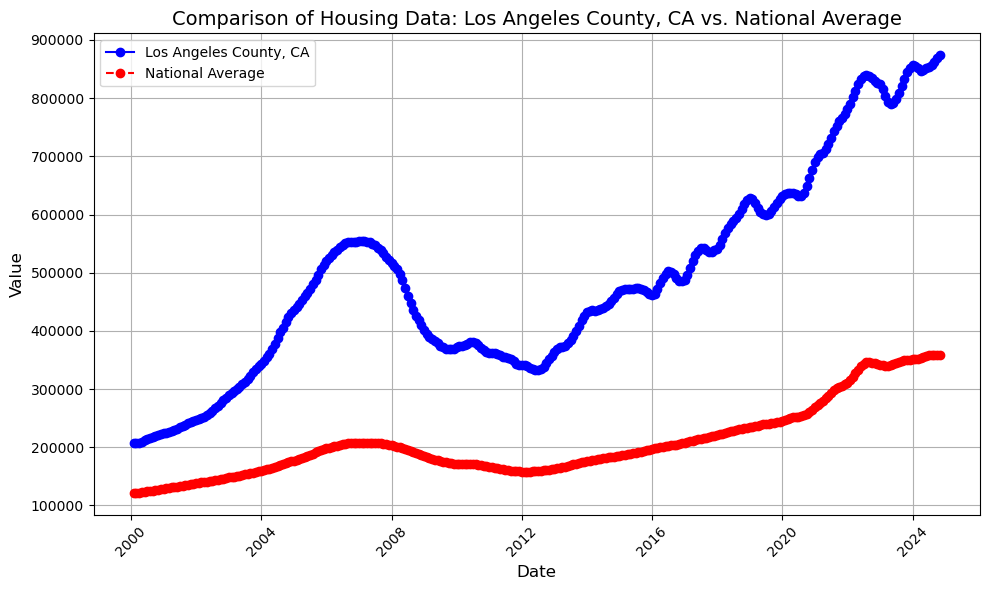

In [18]:
# Filter for the national data
national_time_series = data_with_national[data_with_national["RegionName"] == "United States"][date_columns].T
national_time_series.columns = ["National Average"]
national_time_series.index = pd.to_datetime(date_columns)
national_time_series.index.name = "Date"

# Plot the selected county's data and the national data
plt.figure(figsize=(10, 6))

# Plot the selected county's data
plt.plot(time_series_data.index, time_series_data["Value"], label=f"{selected_county}, {selected_state}", marker='o', linestyle='-', color='b')

# Plot the national data
plt.plot(national_time_series.index, national_time_series["National Average"], label="National Average", marker='o', linestyle='--', color='r')

# Customize the plot
plt.title(f"Comparison of Housing Data: {selected_county}, {selected_state} vs. National Average", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
import pandas as pd

# Load the main dataset (counties)
data = pd.read_csv("zhvi.csv")

# Load the national dataset
zhvi_us = pd.read_csv("zhvi_us.csv")

# Add missing columns to zhvi_us to match data
missing_columns = set(data.columns) - set(zhvi_us.columns)
for col in missing_columns:
    zhvi_us[col] = pd.NA  # Fill missing columns with NaN or default value

# Reorder zhvi_us columns to match data
zhvi_us = zhvi_us[data.columns]

# Append the national data to the county-level dataset
data_with_national = pd.concat([data, zhvi_us], ignore_index=True)

# Export the combined dataset to a CSV for Flask
data_with_national.to_csv("data_with_national.csv", index=False)

print("Combined dataset saved as 'data_with_national.csv'")

Combined dataset saved as 'data_with_national.csv'


In [21]:
import pandas as pd

# Load the regional and national datasets
zori = pd.read_csv("zori.csv")
zori_us = pd.read_csv("zori_us.csv")

# Inspect the first few rows of each dataset
print("Regional Dataset (zori):")
print(zori.head())

print("\nNational Dataset (zori_us):")
print(zori_us.head())


Regional Dataset (zori):
   RegionID  SizeRank          RegionName RegionType StateName State  \
0      3101         0  Los Angeles County     county        CA    CA   
1       139         1         Cook County     county        IL    IL   
2      1090         2       Harris County     county        TX    TX   
3      2402         3     Maricopa County     county        AZ    AZ   
4      2841         4    San Diego County     county        CA    CA   

                                  Metro  StateCodeFIPS  MunicipalCodeFIPS  \
0    Los Angeles-Long Beach-Anaheim, CA              6                 37   
1    Chicago-Naperville-Elgin, IL-IN-WI             17                 31   
2  Houston-The Woodlands-Sugar Land, TX             48                201   
3             Phoenix-Mesa-Chandler, AZ              4                 13   
4    San Diego-Chula Vista-Carlsbad, CA              6                 73   

    2015-01-31  ...   2024-01-31   2024-02-29   2024-03-31   2024-04-30  \
0  1

In [22]:
# Identify missing columns in zori_us
missing_columns = set(zori.columns) - set(zori_us.columns)

# Add missing columns with default values
for col in missing_columns:
    zori_us[col] = pd.NA  # Or a default value like ''

# Reorder columns in zori_us to match zori
zori_us = zori_us[zori.columns]

In [23]:
# Append zori_us to zori
zori_combined = pd.concat([zori, zori_us], ignore_index=True)

# Verify the combined dataset
print("Combined Dataset:")
print(zori_combined.tail())

Combined Dataset:
      RegionID  SizeRank      RegionName RegionType StateName State Metro  \
1786    395130       890    Sterling, CO        msa        CO  <NA>  <NA>   
1787    394371       891    Beatrice, NE        msa        NE  <NA>  <NA>   
1788    394718       892   Jamestown, ND        msa        ND  <NA>  <NA>   
1789    394996       915    Portales, NM        msa        NM  <NA>  <NA>   
1790    394805       916  Los Alamos, NM        msa        NM  <NA>  <NA>   

     StateCodeFIPS MunicipalCodeFIPS  2015-01-31  ...   2024-01-31  \
1786          <NA>              <NA>         NaN  ...          NaN   
1787          <NA>              <NA>         NaN  ...          NaN   
1788          <NA>              <NA>         NaN  ...  1045.626317   
1789          <NA>              <NA>         NaN  ...   967.156106   
1790          <NA>              <NA>         NaN  ...          NaN   

       2024-02-29   2024-03-31   2024-04-30   2024-05-31   2024-06-30  \
1786          NaN        

In [24]:
# Extract columns representing time-series data
date_columns = [col for col in zori_combined.columns if '-' in col and col[:4].isdigit()]
print("Date Columns:", date_columns)


Date Columns: ['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30', '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31', '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31', '2020

In [25]:
# Example: Filter for a specific state and county
state = "CA"  # Replace with your choice
region = "Los Angeles County"  # Replace with your choice

region_data = zori_combined[
    (zori_combined["StateName"] == state) &
    (zori_combined["RegionName"] == region)
]

national_data = zori_combined[zori_combined["RegionName"] == "United States"]


In [26]:
import matplotlib.pyplot as plt

# Prepare time series for the region
region_time_series = region_data[date_columns].T
region_time_series.columns = ["Value"]
region_time_series.index = pd.to_datetime(date_columns)
region_time_series.index.name = "Date"

# Prepare time series for the national average
national_time_series = national_data[date_columns].T
national_time_series.columns = ["National Average"]
national_time_series.index = pd.to_datetime(date_columns)
national_time_series.index.name = "Date"


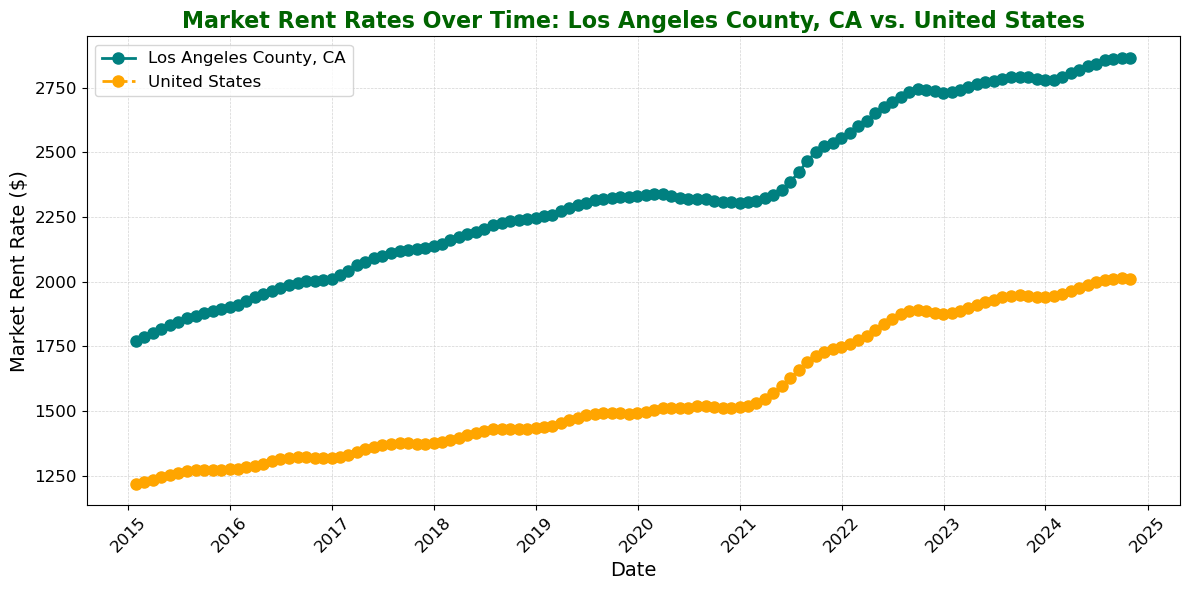

In [27]:
plt.figure(figsize=(12, 6))

# Plot region data
plt.plot(
    region_time_series.index,
    region_time_series["Value"],
    marker='o',
    linestyle='-',
    color='teal',
    linewidth=2,
    markersize=8,
    label=f"{region}, {state}"
)

# Plot national data
plt.plot(
    national_time_series.index,
    national_time_series["National Average"],
    marker='o',
    linestyle='--',
    color='orange',
    linewidth=2,
    markersize=8,
    label="United States"
)

# Formatting the plot
plt.title(f"Market Rent Rates Over Time: {region}, {state} vs. United States", fontsize=16, fontweight='bold', color='darkgreen')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Market Rent Rate ($)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


In [28]:
# Combine the datasets
zori_combined = pd.concat([zori, zori_us], ignore_index=True)

# Check the combined dataset
print("Combined Dataset:")
print(zori_combined.tail())

Combined Dataset:
      RegionID  SizeRank      RegionName RegionType StateName State Metro  \
1786    395130       890    Sterling, CO        msa        CO  <NA>  <NA>   
1787    394371       891    Beatrice, NE        msa        NE  <NA>  <NA>   
1788    394718       892   Jamestown, ND        msa        ND  <NA>  <NA>   
1789    394996       915    Portales, NM        msa        NM  <NA>  <NA>   
1790    394805       916  Los Alamos, NM        msa        NM  <NA>  <NA>   

     StateCodeFIPS MunicipalCodeFIPS  2015-01-31  ...   2024-01-31  \
1786          <NA>              <NA>         NaN  ...          NaN   
1787          <NA>              <NA>         NaN  ...          NaN   
1788          <NA>              <NA>         NaN  ...  1045.626317   
1789          <NA>              <NA>         NaN  ...   967.156106   
1790          <NA>              <NA>         NaN  ...          NaN   

       2024-02-29   2024-03-31   2024-04-30   2024-05-31   2024-06-30  \
1786          NaN        

In [29]:
# Save the combined dataset
zori_combined.to_csv("zori_combined.csv", index=False)
print("Combined dataset saved as 'zori_combined.csv'.")

Combined dataset saved as 'zori_combined.csv'.
